# <center>**Trabajo Práctico Número 1**</center>

### <center>**Recorridos en Ecobicis - Año 2024**</center>

#### <center>Análisis de datos - CEIA, Fiuba</center>

---

**Integrantes del grupo**

- Espínola, Carla
- Gambarte, Antonella

---


### Bibliotecas


In [120]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

### Carga de datos desde archivo cvs


In [121]:
df_recorridos = pd.read_csv("../badata_ecobici_recorridos_realizados_2024.csv")
df_recorridos.head()

,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,genero
0,20428222,568,2024-01-23 18:36:00,513,308 - SAN MARTIN II,Av. San Martín 5129,-58.490739,-34.597130,2024-01-23 18:45:28,498,055 - HABANA,Gral. José Gervasio Artigas 4298 (y Habana),-58.494959,-34.586598,992557.0,FIT,MALE
1,20431744,1355,2024-01-23 22:41:20,460,133 - BEIRO Y SEGUROLA,Segurola 3194,-58.511930,-34.607500,2024-01-23 23:03:55,382,204 - Biarritz,Biarritz 2403,-58.477255,-34.605431,320782.0,FIT,FEMALE
2,20429936,0,2024-01-23 20:06:22,467,328 - SARMIENTO II,Sarmiento 2037,-58.395893,-34.605514,2024-01-23 20:06:22,6,006 - Parque Lezama,"Avenida Martin Garcia, 295",-58.369758,-34.628526,828678.0,FIT,FEMALE
3,20429976,0,2024-01-23 20:08:17,382,204 - Biarritz,Biarritz 2403,-58.477255,-34.605431,2024-01-23 20:08:17,460,133 - BEIRO Y SEGUROLA,Segurola 3194,-58.511930,-34.607500,320782.0,ICONIC,FEMALE
4,20424802,680,2024-01-23 15:18:39,137,137 - AZOPARDO Y CHILE,AZOPARDO 700,-58.367492,-34.615598,2024-01-23 15:29:59,150,150 - RODRIGO BUENO,Av. España 2200,-58.355465,-34.618755,861425.0,FIT,FEMALE


### Shape del dataframe y nombre de columnas


In [122]:
filas,columnas = df_recorridos.shape
print(f"El DataFrame tiene {filas} observaciones y {columnas} variables.")

El DataFrame tiene 3559284 observaciones y 17 variables.


In [123]:
print("Nombre de las variables:")

for i, col in enumerate(df_recorridos.columns):
    print(f"{i+1}. {col}")

Nombre de las variables:
1. id_recorrido
2. duracion_recorrido
3. fecha_origen_recorrido
4. id_estacion_origen
5. nombre_estacion_origen
6. direccion_estacion_origen
7. long_estacion_origen
8. lat_estacion_origen
9. fecha_destino_recorrido
10. id_estacion_destino
11. nombre_estacion_destino
12. direccion_estacion_destino
13. long_estacion_destino
14. lat_estacion_destino
15. id_usuario
16. modelo_bicicleta
17. genero


### Tipos de datos de cada variable


In [124]:
print(f"Columnas del dataframe:\n{df_recorridos.dtypes}\n")

Columnas del dataframe:
id_recorrido                    int64
duracion_recorrido              int64
fecha_origen_recorrido         object
id_estacion_origen              int64
nombre_estacion_origen         object
direccion_estacion_origen      object
long_estacion_origen          float64
lat_estacion_origen           float64
fecha_destino_recorrido        object
id_estacion_destino             int64
nombre_estacion_destino        object
direccion_estacion_destino     object
long_estacion_destino         float64
lat_estacion_destino          float64
id_usuario                    float64
modelo_bicicleta               object
genero                         object
dtype: object



### Para las fechas hacemos conversión


In [125]:
df_recorridos['fecha_destino_recorrido'] = pd.to_datetime(df_recorridos['fecha_destino_recorrido'])
df_recorridos['fecha_origen_recorrido'] = pd.to_datetime(df_recorridos['fecha_origen_recorrido'])

print(f"Columnas del dataframe:\n{df_recorridos.dtypes}\n")

Columnas del dataframe:
id_recorrido                           int64
duracion_recorrido                     int64
fecha_origen_recorrido        datetime64[ns]
id_estacion_origen                     int64
nombre_estacion_origen                object
direccion_estacion_origen             object
long_estacion_origen                 float64
lat_estacion_origen                  float64
fecha_destino_recorrido       datetime64[ns]
id_estacion_destino                    int64
nombre_estacion_destino               object
direccion_estacion_destino            object
long_estacion_destino                float64
lat_estacion_destino                 float64
id_usuario                           float64
modelo_bicicleta                      object
genero                                object
dtype: object



### Ahora comprobamos si existen observaciones duplicadas


In [126]:
print("Cantidad de datos duplicados:", df_recorridos.duplicated().sum())

Cantidad de datos duplicados: 1


In [127]:
duplicados = df_recorridos[df_recorridos.duplicated(keep=False)]
print("Datos de duplicado:\n")
duplicados.head()


Datos de duplicado:



,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,genero
434350,22425357,1119,2024-07-23 12:30:30,104,104 - Federico Lacroze,Av. Guzman 1100 & Av. Corrientes,-58.455212,-34.587617,2024-07-23 12:49:09,402,-- CDO Chacarita -- (Temporal),3209 Av. Francisco Beiro,-58.498542,-34.597612,1039158.0,FIT,MALE
434351,22425357,1119,2024-07-23 12:30:30,104,104 - Federico Lacroze,Av. Guzman 1100 & Av. Corrientes,-58.455212,-34.587617,2024-07-23 12:49:09,402,-- CDO Chacarita -- (Temporal),3209 Av. Francisco Beiro,-58.498542,-34.597612,1039158.0,FIT,MALE


### Existe solo un duplicado. Procedemos a eliminarlo.


In [128]:
df_recorridos = df_recorridos.drop_duplicates()
print("Duplicados después:", df_recorridos.duplicated().sum())

Duplicados después: 0


### Datos faltantes


In [129]:
print(f"Valores faltantes:\n{df_recorridos.isna().sum()}") 

Valores faltantes:
id_recorrido                      0
duracion_recorrido                0
fecha_origen_recorrido            0
id_estacion_origen                0
nombre_estacion_origen            0
direccion_estacion_origen         0
long_estacion_origen              0
lat_estacion_origen               0
fecha_destino_recorrido        3379
id_estacion_destino               0
nombre_estacion_destino           0
direccion_estacion_destino        0
long_estacion_destino             0
lat_estacion_destino              0
id_usuario                        0
modelo_bicicleta                  0
genero                        11946
dtype: int64


### Calculo de la proporción de valores nulos en cada columna


In [130]:
df_recorridos.isna().mean().round(4)*100

id_recorrido                  0.00
duracion_recorrido            0.00
fecha_origen_recorrido        0.00
id_estacion_origen            0.00
nombre_estacion_origen        0.00
direccion_estacion_origen     0.00
long_estacion_origen          0.00
lat_estacion_origen           0.00
fecha_destino_recorrido       0.09
id_estacion_destino           0.00
nombre_estacion_destino       0.00
direccion_estacion_destino    0.00
long_estacion_destino         0.00
lat_estacion_destino          0.00
id_usuario                    0.00
modelo_bicicleta              0.00
genero                        0.34
dtype: float64

Los porcentajes de faltantes son muy chicos con respecto a la cantidad total de observaciones, tanto para fecha_destino_recorrido como para género.

### Matriz de valores faltantes


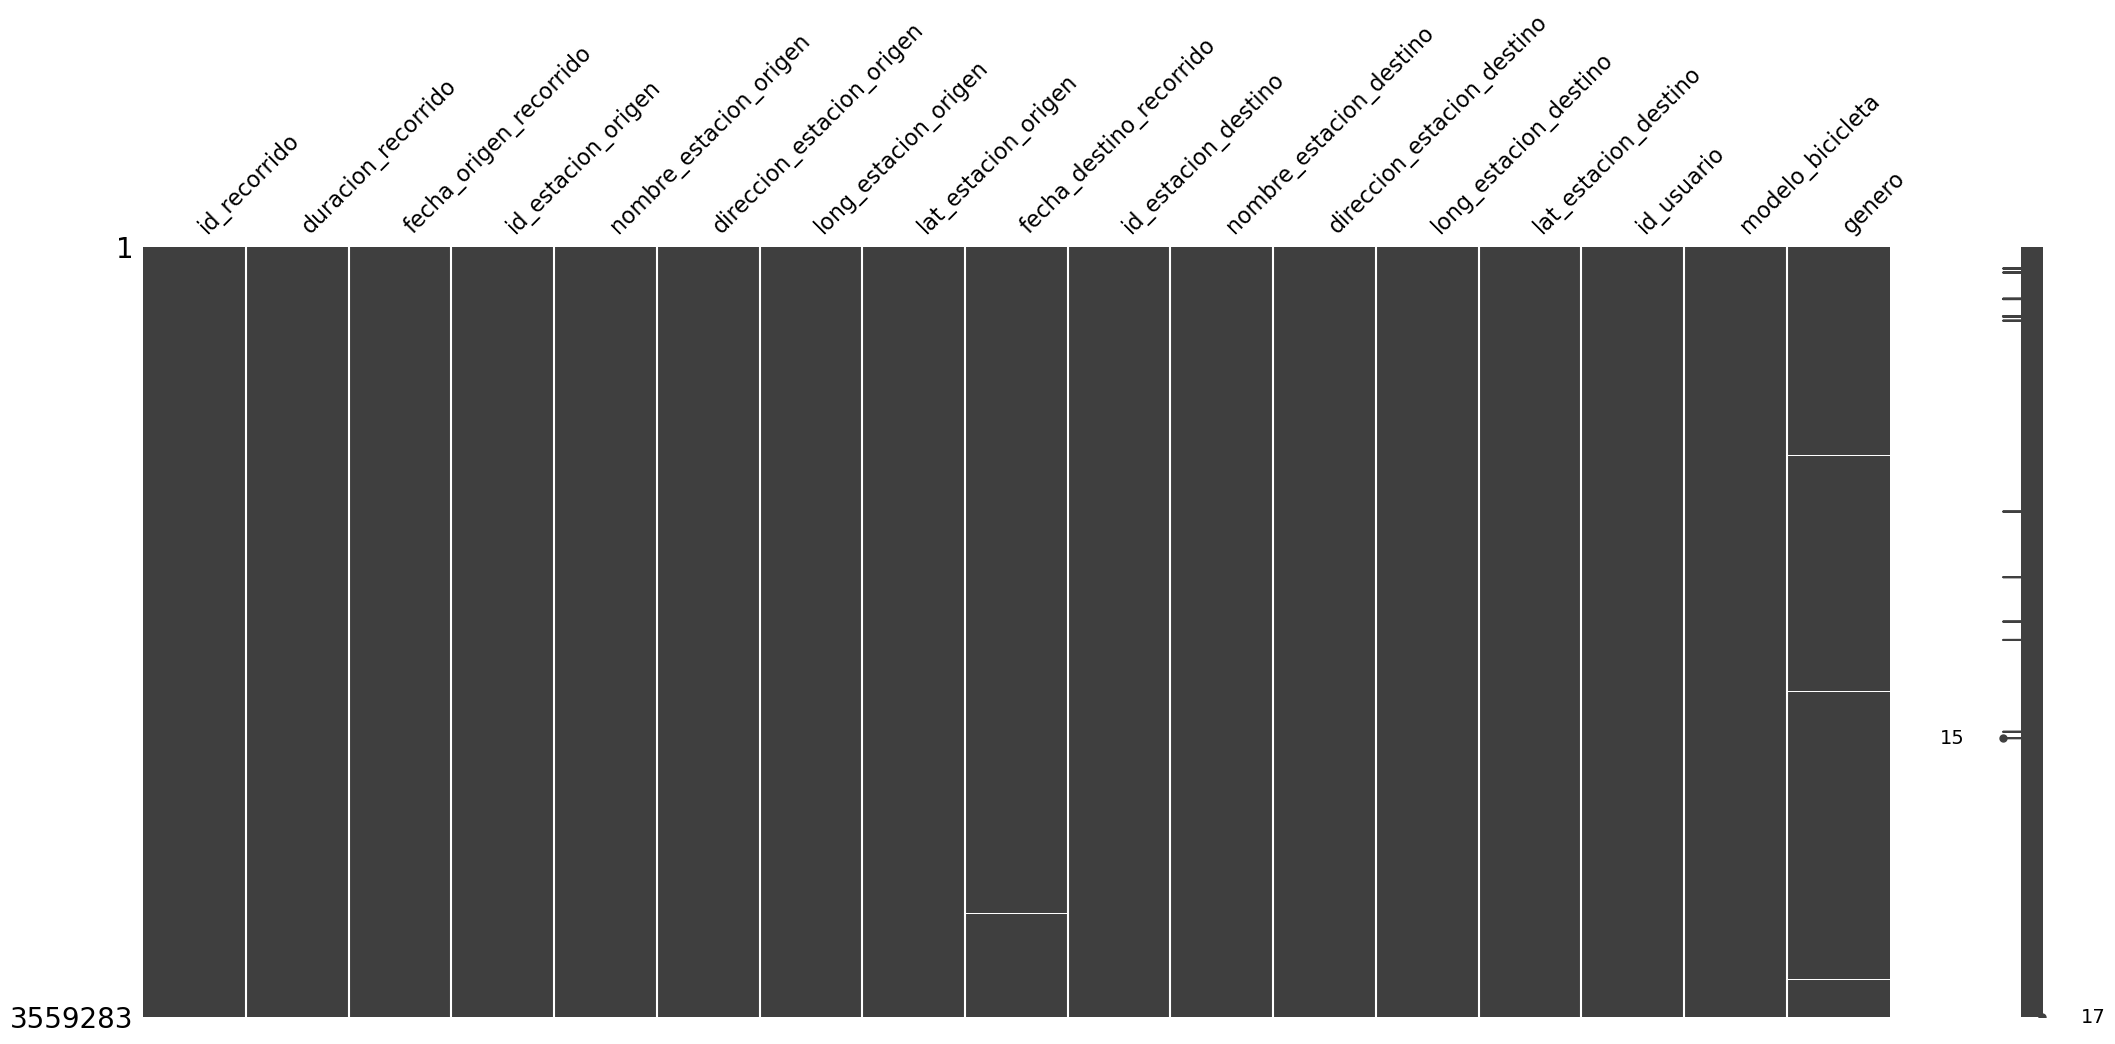

In [131]:
msno.matrix(df_recorridos)
plt.show()


Analizamos si existe correlacción entre los valores nulos de las columnas


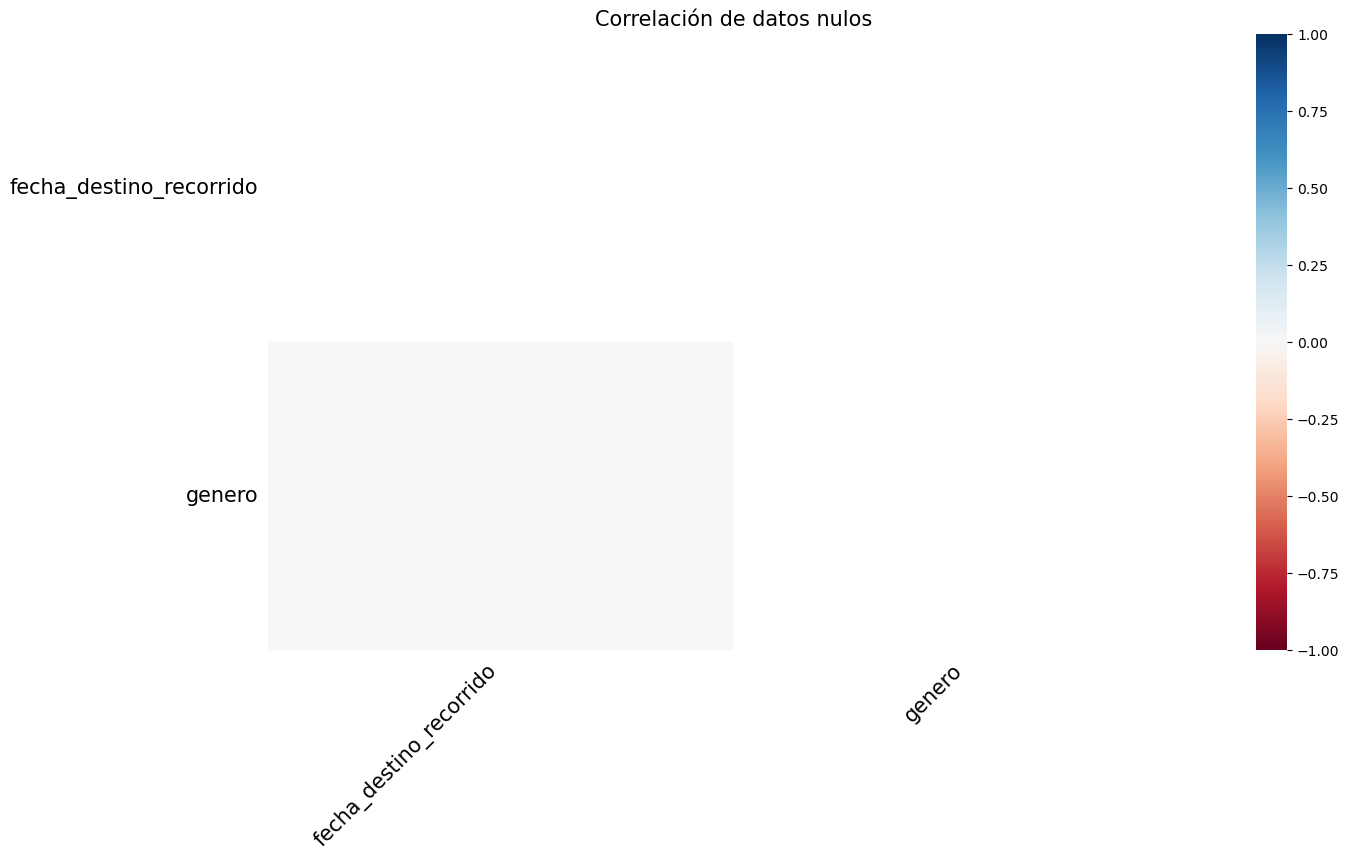

In [132]:
msno.heatmap(df_recorridos, fontsize=15, figsize=(15,8))
plt.title("Correlación de datos nulos", fontsize=15)
plt.show()

Observamos que no exite correlación entre los datos faltantes de las columnas género y fecha destino.


## Análisis de las causas de los datos faltantes


Vamos a analizar primero los faltantes de género.

De las observaciones que conforman el dataset, armamos dos grupos. Uno con aquellos que contienen la variable genero completa y otro con aquellos que tienen ese campo vacío.


In [133]:
con_genero = df_recorridos[df_recorridos['genero'].notnull()]
sin_genero = df_recorridos[df_recorridos['genero'].isnull()]

Primero analizamos los faltantes con respecto al modelo de bicicleta.


In [134]:
print("Distribución modelo_bicicleta (con género):")
print(con_genero['modelo_bicicleta'].value_counts(normalize=True))

print("\nDistribución modelo_bicicleta (sin género):")
print(sin_genero['modelo_bicicleta'].value_counts(normalize=True))

Distribución modelo_bicicleta (con género):
modelo_bicicleta
FIT       0.725544
ICONIC    0.274456
Name: proportion, dtype: float64

Distribución modelo_bicicleta (sin género):
modelo_bicicleta
FIT       0.727775
ICONIC    0.272225
Name: proportion, dtype: float64


Observamos que la distribución de modelo_bicicleta es prácticamente igual con y sin género. Entonces, el tipo de bicicleta no influye en los faltantes de género.

Ahora comparamos con respecto a la duración del recorrido. Calculamos el valores promedio de duración de recorridos tanto para las observaciones con género informado y sin género informado.


In [135]:
duracion_promedio = df_recorridos.groupby(df_recorridos['genero'].isnull())['duracion_recorrido'].mean()/ 60
duracion_promedio.index = ['Con genero', 'Sin genero']
duracion_promedio.head()

Con genero    21.259858
Sin genero    17.462573
Name: duracion_recorrido, dtype: float64

Vemos que los que para los que no tienen género informado, la duración promedio es aproximádamente 4 minutos menor. Esto sugiere que la menor duración podría estar relacionada con la ausencia del dato de género.

Para confirmar si la falta de información de género depende efectivamente de otras variables, realizamos comparaciones utilizando la fecha de origen. En particular, analizamos la distribución de viajes según el mes y el día de la semana.


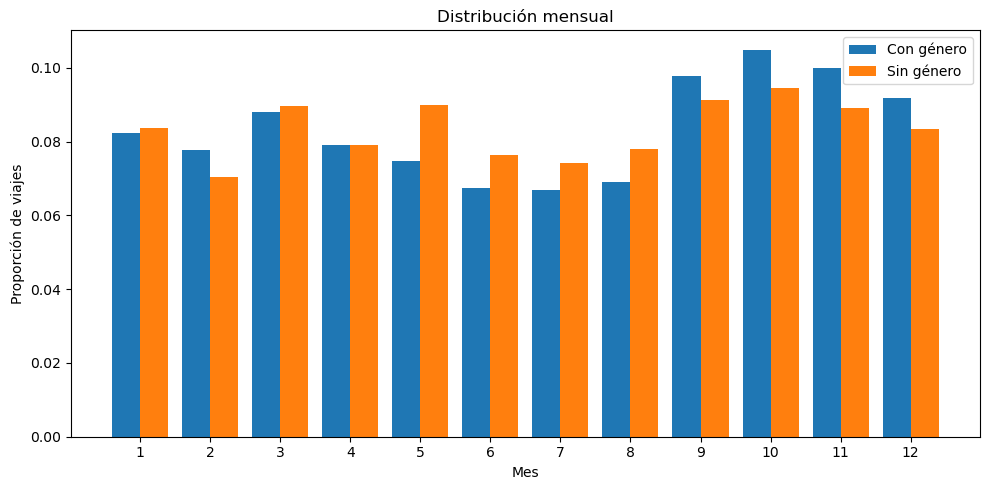

In [136]:
# Extraemos mes y día de la semana de la columna fecha_origen_recorrido
df_recorridos['mes_origen'] = df_recorridos['fecha_origen_recorrido'].dt.month
df_recorridos['dia_semana_origen'] = df_recorridos['fecha_origen_recorrido'].dt.day_name()

# Separamos por grupos
con_genero = df_recorridos[df_recorridos['genero'].notnull()]
sin_genero = df_recorridos[df_recorridos['genero'].isnull()]

# Calculo de proporciones por mes
dist_mes_con = con_genero['mes_origen'].value_counts(normalize=True).sort_index()
dist_mes_sin = sin_genero['mes_origen'].value_counts(normalize=True).sort_index()

# Gráfico
plt.figure(figsize=(10, 5))
plt.bar(dist_mes_con.index - 0.2, dist_mes_con.values, width=0.4, label='Con género')
plt.bar(dist_mes_sin.index + 0.2, dist_mes_sin.values, width=0.4, label='Sin género')
plt.xticks(range(1, 13))
plt.xlabel("Mes")
plt.ylabel("Proporción de viajes")
plt.title("Distribución mensual")
plt.legend()
plt.tight_layout()
plt.show()


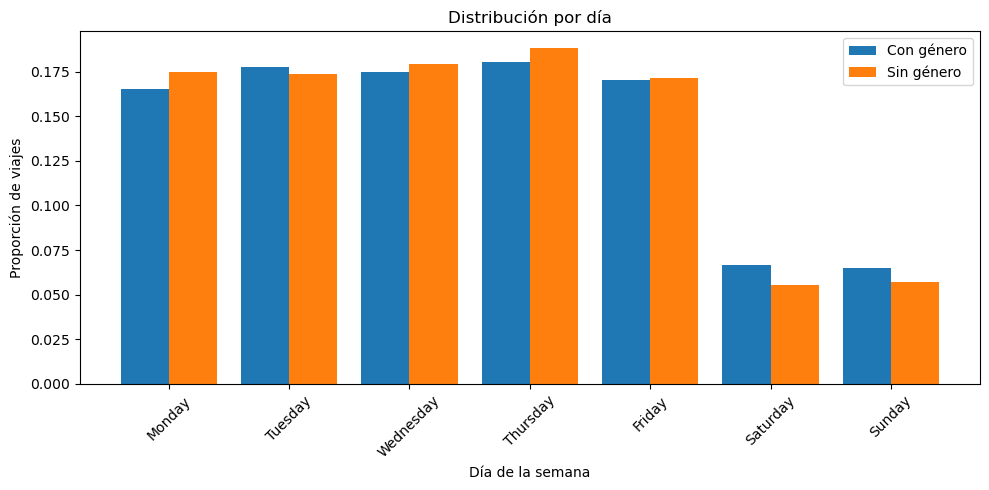

In [137]:
# Definición de días
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Proporciones por día
dist_dia_con = con_genero['dia_semana_origen'].value_counts(normalize=True).reindex(dias_orden)
dist_dia_sin = sin_genero['dia_semana_origen'].value_counts(normalize=True).reindex(dias_orden)

# Gráfico
plt.figure(figsize=(10, 5))
x = range(len(dias_orden))
plt.bar([i - 0.2 for i in x], dist_dia_con.values, width=0.4, label='Con género')
plt.bar([i + 0.2 for i in x], dist_dia_sin.values, width=0.4, label='Sin género')
plt.xticks(x, dias_orden, rotation=45)
plt.xlabel("Día de la semana")
plt.ylabel("Proporción de viajes")
plt.title("Distribución por día")
plt.legend()
plt.tight_layout()
plt.show()


Si hacemos la comparación por días de la semana, el día sabádo y domingo existe una ligera diferencia entre las distribuciones para el grupo de tienen género con respecto a los que no. En donde si existe mayor diferencia es en la comparativa mes a mes. Esto sugiere que los datos faltantes de género si depende de otra variable, en este caso, la fecha de origen, por lo que es de tipo MAR.
